### Week 1: NN
1. **Refresh you Python skills** (if needed!). Some useful courses are: 

    Python Essentials

    https://www.linkedin.com/learning/python-essential-training-2

    Numpy

    https://www.linkedin.com/learning/numpy-data-science-essential-training

    Pandas & Matplotlib

    https://www.linkedin.com/learning/python-functions-for-data-science
 
    Scikit-Learn

    https://www.linkedin.com/learning/machine-learning-with-scikit-learn

2. **Demonstrate how to implement a neural network in Python3 using Tensorflow 2.0**. 

3. **Demonstrate Python script to train and deploy a model.**

**Notes**
- You will need to install Tensorflow (version 2 or >) and Keras on your computer. 
- All course materials will be in Jupyter Notebooks, so please install that too. 
 
### Fashion MNIST data

The dataset contains 60,000 small square 28 $\times$ 28 pixel grayscale images of 10 types of clothing:

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot


**Our tasks are**
- **To construct a simple Vanilla Neural Network (VNN) to classify the type of clothing using Keras & Tensorflow** 
- **To write a Python script to train a VNN in a local machine**


### Load Keras, TensorFlow and other package 

In [1]:
import os #https://docs.python.org/3/library/os.html
import tensorflow as tf #https://www.tensorflow.org/
import keras #https://keras.io/
import numpy as np #https://numpy.org/
from matplotlib import pyplot #https://matplotlib.org/

Using TensorFlow backend.


In [27]:
tf.__version__, keras.__version__ #Check versions of tensorflow & keras

('2.4.1', '2.3.0')

### Download Fashion MNIST data from Keras 

In [2]:
from keras.datasets import fashion_mnist #get Fashion MNIST from Keras

(x_train, y_train), (x_val, y_val) = fashion_mnist.load_data() #loads the Fashion-MNIST dataset.

In [29]:
#Each image is represented as a 28x28 pixel grayscale images
## View shape and type of data
xtr = x_train.shape, x_train.dtype
ytr = y_train.shape, y_train.dtype

print("x_train_shape & data type:", xtr)
print("y_train_shape & data type:", ytr)


x_train_shape & data type: ((60000, 28, 28), dtype('uint8'))
y_train_shape & data type: ((60000,), dtype('uint8'))


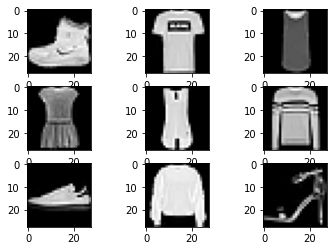

In [4]:
## view some of the data by plotting a few of the raw pixel data as images

for i in range(9): #loop through the first 9 objects

    pyplot.subplot(330 + 1 + i) #define figure with grid of subplots (3 cols, 3 rows)

    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray')) # display raw pixel data as image

### Next we need to create a local directory for storing the training and test data separately

In [20]:
os.makedirs("./data", exist_ok=True) #exist_ok = True means no error if directory already exists
np.savez('./data/training', image = x_train, label=y_train) #save the training data into a folder called training
np.savez('./data/test', image=x_val, label=y_val) #save the test data into a folder called test
os.makedirs("./output", exist_ok=True) #make a directory for the output 

#### Check if training and test data are upload to "data" folder using a magic shell command

In [25]:
%%sh
ls -l data

total 111296
-rw-r--r--@ 1 jc351340  1675842189   7850506  5 May 09:22 test.npz
-rw-r--r--@ 1 jc351340  1675842189  47100506  5 May 09:22 training.npz


### A simple structure of VNN
![title](NN.png)

### Download packages needed from Keras and Tensorflow

In [26]:
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.utils import to_categorical

### Build a VNN model

#### Build an VNN Image Classifier using the Keras Sequential API

Sequential models are the simplist kind of Keras model for neural networks. They are composed of a single stack of layers connected sequentially, and is called the Sequential API. 

#### Steps needed 

1. *Shape:* ensuring the dataset have the right shape for TensorFlow
2. *Normalisation:* normalising the data, *i.e.* tranform [0-255] pixels values to [0-1] value
3. *One-Hot Encode Class Labels:* convert category labels using one-hot encoding
4. *Building the model:* build a sequential model in Keras
5. *Training:* train the model
6. *Test:* test the model and make predictions 

#### Steps 1, 2 & 3: Shape, Normalise and One Hot Encoding 

In [37]:
# loading the datasets
## note: the datasets were already loaded here using fashion_mnist.load_data()
##       this is to demonstrate how you would load your own data

x_train = np.load(os.path.join("./data", 'training.npz'))['image'] #load training data images using numpy
y_train = np.load(os.path.join("./data", 'training.npz'))['label'] #load training data classes 
x_test = np.load(os.path.join("./data", 'test.npz'))['image'] #load testing data images 
y_test = np.load(os.path.join("./data", 'test.npz'))['label'] #load testing data classes 

# define image dimensions
img_rows, img_cols = 28, 28 #images are 28*28 pixels

# 1. Shape: Tensorflow needs image channels last, e.g. (batch size, width, height, channels)
if K.image_data_format() == 'channels_last': #K.image_data_format() return a string, either 'channels_first' or 'channels_last'
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    batch_norm_axis = -1
else:
    # Keras is configured with channels first (Apache MXNet backend)
    print('Channels first, exiting')
    exit(-1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# 2. Normalize pixel values i.e. tranform [0-255] pixels values to [0-1] value 
x_train = x_train.astype('float32') #convert to data type float32
x_test = x_test.astype('float32') #convert to data type float32
x_train /= 255 #divide by 255 to rescale [0-255] to [0-1]
x_test /= 255 #divide by 255 to rescale [0-255] to [0-1]

# 3. One Hot Encoding: Convert class vectors to binary class matrices
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("y_test:", y_test)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
y_test: [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Step 4: Building a sequential VNN model in Keras 

Note: First we will go thorugh building the model on a local machine. Next, we will go through how to run in a script to prepare for using AWS in Week 2

We will build a VNN with the following structure:

- Number of Hidden layers = 2: The first hidden layer contains 64 neurons while the second layer includes 32 neurons. 
- Activation function: Both hidden layers will use the Relu activation function
- Optimizer: Stochastic Gradient Descent

In [53]:
# First, we define the model struction
# We can pass a list of layers to tf.keras.models.Sequential()

model = tf.keras.models.Sequential([ # creates a sequential model
        tf.keras.layers.Flatten(), # build the first layer preprocesses the input images into 1D array
        tf.keras.layers.Dense(64, activation=tf.nn.relu), # dense hidden layer with 64 neurons and Relu AF
        tf.keras.layers.Dense(32, activation=tf.nn.relu), # dense hidden layer with 32 neurons and Relu AF
        tf.keras.layers.Dense(10, activation=tf.nn.softmax) # dense output layer with 1- neurons and the 
                                                            # softmax activation function 
    ])


In [55]:
# Second, we compile the model
# Compiling a model defines the loss function, the optimizer and the metrics

model.compile(loss=categorical_crossentropy, # categorical_crossentropy appropriate for one-hot encoded, exclusive classes
              optimizer=SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True), #backpropogation using SGD
              metrics=['accuracy', #how are we going to measure classification "accuracy"?
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])

#### Step 5: Training the model 

Now we are ready to train the model

In [70]:
history = model.fit(x_train, y_train, batch_size=10, # pass in input features and classes, 
                    validation_split=0.1, # The model will set apart this fraction of the training data, 
                                # will not train on it, and will evaluate the loss and any model metrics 
                                # on this data at the end of each epoch. The validation data is selected 
                                # from the last samples in the x and y data provided, before shuffling. 
                     epochs=2) #how many iterations over the entire training dataset 

# note: we will talk about how to tune these parameters in week 3

# we can use the summary() function to display a summary of the model
model.summary()

Epoch 1/2
5400/5400 [==============================] - 9s 2ms/step - loss: 0.2454 - accuracy: 0.9092 - precision_1: 0.9250 - recall_1: 0.8950 - val_loss: 0.3288 - val_accuracy: 0.8832 - val_precision_1: 0.9012 - val_recall_1: 0.8695
Epoch 2/2
5400/5400 [==============================] - 8s 1ms/step - loss: 0.2408 - accuracy: 0.9114 - precision_1: 0.9271 - recall_1: 0.8978 - val_loss: 0.3262 - val_accuracy: 0.8843 - val_precision_1: 0.9022 - val_recall_1: 0.87170.9281 - recall_ - ETA: 2s - loss: 0.2406 - accuracy: 0.9118 - precision_1: 0.9279 - recal - ETA: 1s - loss: 0.2405 - accuracy: 0.9116 - pr
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                50240     
___________________________________________

(0.0, 1.0)

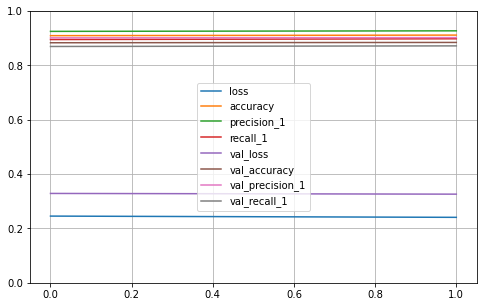

In [71]:
## We can plot the model with pandas and matlibplot.pyplot

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
pyplot.grid(True)
pyplot.gca().set_ylim(0,1) #set the limits of the y axis

# At this this stage, you could go back and tune the hyperparameters of your model. 
# This is a discussion for week 3
# Note, this should be done BEFORE you evaluate your model on the test set or your estimate of error
# will be too optimistic!

#### Step 5: Testing the model 

- Evaluating the performace of the model 

In [69]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss    :', score[0])
print('Test accuracy:', score[1])
print('Test precision:', score[2])
print('Test recall:', score[3])

Validation loss    : 0.36940404772758484
Validation accuracy: 0.8738999962806702
Validation precision: 0.8920572400093079
Validation recall: 0.8603000044822693


- Making predictions - this is your **homework** (on a local machine and via AWS)

### Running the model using the Python script

We are now going to learn how to write a Python script so that we can easily train the model on AWS SageMaker. To do that we need to parse some [AWS environment variables](https://github.com/aws/sagemaker-containers#list-of-provided-environment-variables-by-sagemaker-containers) in a Python script.
 
**Why are these environment variables important?** 
- They will be automatically passed to our script by AWS SageMaker, so that Sagemaker can find where the data sets are, where to save the model, and how many GPUs we have. 
- In other words, the step is to ensure that we do not change the code much when training and deploying the model on AWS.


In [74]:
%%sh
pygmentize mnist_fashion_vnn_tf2.py

import argparse, os
import numpy as np

import tensorflow as tf
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import multi_gpu_model, to_categorical

import subprocess
import sys


# AWS script mode doesn't support requirements.txt

def install(package):
    subprocess.call([sys.executable, "-m", "pip", "install", package])


if __name__ == '__main__':

    # Keras-metrics brings additional metrics: precision, recall, f1
    # AWS is missing keras metrics 
    install('keras-metrics')
    import keras_metrics

    

    # Hyperparameters
    ## all set at particular value here. In week 3 we will learn how to tune parameters without setting a default
    parser = argparse.Argu

In [1]:
# where to save the model
%env SM_MODEL_DIR =/tmp/model

# where the training data is
%env SM_CHANNEL_TRAINING = data

# where the validation data is
%env SM_CHANNEL_VALIDATION = data

# where the validation data is
%env SM_NUM_GPUS = 0
!/bin/rm -rf $SM_MODEL_DIR
!python mnist_fashion_vnn_tf2.py --epochs 2 

env: SM_MODEL_DIR=/tmp/model
env: SM_CHANNEL_TRAINING=data
env: SM_CHANNEL_VALIDATION=data
env: SM_NUM_GPUS=0
Using TensorFlow backend.
You should consider upgrading via the '/Users/jc351340/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
2021-05-05 15:15:39.598177: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-05 15:15:39.598890: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32,

### Some references
- Tensorflow : https://www.tensorflow.org/guide/keras/sequential_model
- Tensorflow script mode: https://github.com/awslabs/amazon-sagemaker-examples/blob/master/sagemaker-python-sdk/tensorflow_script_mode_training_and_serving/tensorflow_script_mode_training_and_serving.ipynb
- Practice as many as examples that you can!!!
- Machine Learning Mastery: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/
- Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow by Aurélion Géron